<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/modelo_inhibicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Modelo 6 (Inhibición)

Nombre: JM

Fecha: Enero 2021

# Modelado de ecuaciones

El modelo dinámico se desarrolla escribiendo balances de materiales en la biomasa (células) y el sustrato (fuente de alimentación para celss). La biomasa crece alimentándose del sustrato.

## Balance de materia  (biomasa)

Escribimos el balance de materia de biomasa como:

$$rate\ of\ accumulation\ =\ in\ by\ flow\ -\ out\ by\ flow\ +\ generation$$

<a id='equation-la-se2'></a>
$$
\frac{d(Vx)}{dt} = F_{in}x_{f} - Fx + V r_1 \tag{1}
$$


where $x_f$ is the concentration of biomass in the feed stream and $F$ is the volumetric flowrate.

## Balance de materia (sustrato)

$$rate\ of\ accumulation\ =\ in\ by\ flow\ -\ out\ by\ flow\ \ consumption$$

<a id='equation-la-se2'></a>

$$
\frac{d(Vs)}{dt} = F_{in}s_{f} - Fs + V r_2 \tag{2}
$$

where $s_f$ is the concentration of substrate in the feed stream


# Tasa de crecimiento específica

La velocidad de reacción (masa de células generadas / tiempo de volumen) se escribe normalmente a continuación de. 

<a id = 'equation-la-se2'></a>
$$
r_1 = \mu x \tag{3}
$$

donde $ \mu $ es el coeficiente de tasa de crecimiento específico. Podemos pensar en $ \mu $ como algo similar a una constante de velocidad de reacción de primer orden; sin embargo, $ \mu $ no es constante, es una función de la concentración de sustrato. Las unidades de $ \mu $ son $ time^{- 1} $.

# Rendimiento

Existe una relación entre la tasa de generación de biomasa y la tasa de consumo de sustrato. Defina $Y$ como el rendimiento, es decir, la masa de células producidas por masa de sustrato consumido. 

<a id = 'equation-la-se2'></a>
$$
Y = \frac{mass\ of\ cells\ produced}{mass\ of\ substrate\ consumed} = \frac{r_1}{r_2} \tag{4}
$$

from (4) we can write:

<a id = 'equation-la-se2'></a>
$$
r_2 =  \frac{r_1}{Y}\tag{5}
$$

<a id = 'equation-la-se2'></a>
$$
r_2 =  \frac{\mu x}{Y}\tag{6}
$$

asumimos en el análisis posterior que $Y$ es constante

# Tasa de dilución

Suponiendo un reactor de volumen constante, podemos escribir (1) y (2) como

<a id = 'equation-la-se2'></a>
$$
\frac{dx}{dt} =  \frac{F_{in}}{V}x_f - \frac{F}{V}x + r_1  \tag{7}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{ds}{dt} =  \frac{F_{in}}{V}s_f - \frac{F}{V}s - r_2  \tag{8}
$$

Definiendo $ F / V $ como $ D $, la tasa de dilución, y usando la expresión de tasa en (3) y (6) encontramos.

<a id = 'equation-la-se2'></a>
$$
\frac{dx}{dt} =  Dx_f - Dx + \mu x  \tag{9}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{ds}{dt} =  Ds_f - Ds - \frac{\mu x}{Y}  \tag{10}
$$

Generalmente, se supone que no hay biomasa en la corriente de alimentación, por lo que $ x_f = 0 $. Las ecuaciones de modelado del biorreactor normalmente se escriben de la siguiente forma:

<a id = 'equation-la-se2'></a>
$$
\frac{dx}{dt} =   (\mu-D) x  \tag{11}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{ds}{dt} =  D(s_f - s) - \frac{\mu x}{Y}  \tag{12}
$$

La tasa de dilución (D) es la inversa del tiempo de residencia del reactor y tiene unidades de $tiempo^{- 1}$.

# Expresiones de tasa de crecimiento

El coeficiente de la tasa de crecimiento no suele ser constante. Se han desarrollado varias relaciones funcionales entre el coeficiente de tasa de crecimiento y la concentración de sustrato. Los más comunes son (i) Monod y (ii) Inhibición del sustrato.

### Monod

El coeficiente de la tasa de crecimiento a menudo varía de forma hiperbólica. Monod propuso lo siguiente en 1942. Observe que $ \ mu $ es de primer orden a $ s $ bajos y de orden cero a $ s $ altos.


<a id = 'equation-la-se2'></a>
$$
\mu = \frac{\mu_{max}s}{k_m + s} \tag{13}
$$

cuado s is baja: 

$$
\mu \approx \frac{\mu_{max}}{k_m}s
$$
cuando s es alta: 

$$
\mu \approx \mu_{max}
$$

Debido a que la velocidad de reacción es:

$$
r_1 = \mu x
$$

this means that the Monod description is similar to a second-order (biomolecular) reaction when $s$ is low, since 

$$
r_1 \approx \frac{\mu_{max}}{k_m} x
$$

and to a first-order reaction when $s$ is high, since 

$$
r_1 \approx \mu_{max} x
$$

La ecuación (13) tiene la misma forma que la isoterma de adsorción de Langmuir y la ecuación de velocidad estándar para reacciones catalizadas por enzimas con un solo sustrato.

### Inhibición por sustrato

A veces, el coeficiente de tasa de crecimiento aumenta con una concentración de sustrato baja, pero disminuye con una concentración de sustrato alta. Este efecto se llama inhibición del sustrato y está representado por la siguiente ecuación:

<a id = 'equation-la-se2'></a>
$$
\mu = \frac{\mu_{max}s}{k_m + s + k_I s^{2}} \tag{14}
$$

In [9]:
# cargar librerias 
install.packages("deSolve")
library(deSolve)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
# monod equation 
monod <- function(s) {

  mu = mu_max*s/(km + s)

  return(mu)
}

In [11]:
# substrate inhibition equation 
subinhib <- function(s) {

  mu = mu_max*s/(km + s + ki*s^2)

  return(mu)
}

In [12]:
# establish parameter values

# monod
mu_max <- 0.53 # hr^-1
km <- 0.12 # g/L
Y <- 0.4
sf <- 4.0 # g/L

# inhibition
mu_max <- 0.53 # h^-1
ks <- 0.12 # g/L
ki <- 0.4545 # g/L
sf <- 4.0 # g/L

In [13]:
s <- seq(0,5,len=100)
mu_mod <- monod(s)
mu_inh <- subinhib(s)
data <- data.frame(s = s, monod = mu_mod, inhibition = mu_inh)


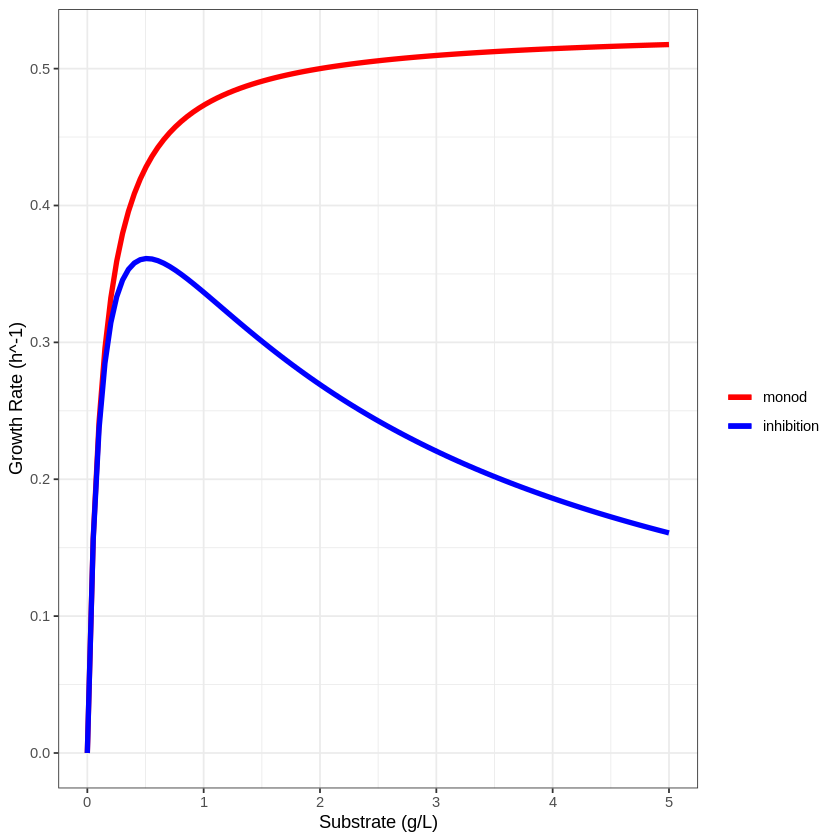

In [14]:
ggplot(data,aes(s)) +
  geom_line(aes(y=monod, color = "monod"), lwd = 1.5) +
  geom_line(aes(y=inhibition, color = "inhibition"), lwd = 1.5) +
  scale_color_manual("", breaks = c("monod", "inhibition"),
                          values = c("red","blue")) +
  xlab("Substrate (g/L)") +
  ylab("Growth Rate (h^-1)") +
  theme_bw()

Figura 2. Comparación de modelos de inhibición Monod y Substrate para la tasa de crecimiento.

| Monod | Inhibición por sustrato |
| :------- | :----: | 
| $\mu_{max}$ = 0.53 $h^{-1}$ | $\mu_{max}$ = 0.53 $h^{-1}$ |
| $k_s$ = 0.12 g/L | $k_m$ = 0.12 g/L | 
| Y = 0.4 | $k_I$ = 0.4545 L/g  |
| $s_f$ = 4.0 g/L | $s_f$ = 4.0 g/L |

Observe que la ecuación de Monod es un caso especial de (14), con $ k_I = 0 $

# Análisis de estabilidad  modelo de Monod

Describir los puntos de equilibrio, explicar cómo los obtienen, y si esperan/observan bifurcaciones. Incluir código comentado o procedimiento algebraico. 

En las siguiente secciones se describen con detalle los puntos de equilibrio así como su dependencia con respecto a los parámetros del modelo. Sin embargo, aquí se muestran los dos puntos de equilibrio que se encontraron:

$$\frac{ds}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm} D(s_{f} - s) - r_{2} = 0  \hspace{1cm}  (1)$$
$$\frac{dx}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm}  r_{1} - Dx = 0 \hspace{1cm} (2)$$

Resolviendo la ecuación 1 y 2 para las variables $s$ y $x$, se obtienes los siguientes puntos de equilibrio:



$$P_{1}: \hspace{1cm} \bar{s} = s_{f}, \hspace{0.25cm} \bar{x} = 0$$ \

$$P_{2}: \hspace{1cm} \bar{s} = \frac{Dk}{\mu - D}, \hspace{0.25cm} \bar{x} = \frac{y(Dk + s_{f}(D-\mu))}{D-\mu}$$

Puntos de equilibrio obtenidos con Python.

https://github.com/JuanM-GG/Biologia-de-sistemas/blob/main/puntos_de_equilibrio.ipynb

In [15]:
# cargar Grind.R
install.packages("rootSolve")
install.packages("FME")
source("Grind.R")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: coda



grind.R was sourced


In [41]:
model <- function(times, state, parms) {
  with(as.list(c(state, parms)), {

    # velocidad de crecimiento (Monod)
    r1 = mu*s/(k+s + ki*s^2)*x

    # balances de especies
    ds = -(1/y)*r1 + D*(sf - s)
    dx = r1 - D*x

    return(list(c(ds,dx))) 
  })
}

In [42]:
# establecer parámetros 
p <- c(mu = 1.2, k = 180, y = 0.1, D = 0.01, sf = 10, ki = 0)

In [43]:
# condiciones iniciales
s <- c(s = 10, x = 0.1)

In [44]:
# tiempo de simulación 
time <- seq(0,100,len=100)

In [45]:
# función para calcular los puntos de equilibrio
steady_state <- function(p) {
  with(as.list(p), {

    # Primer punto de equilibrio
    s1 = sf
    x1 = 0
    ss1 = c(s = s1, x = x1)

    # segundo punto de equilibrio
    s2 = D*k/(mu - D)
    x2 = y*(D*k + sf*(D - mu))/(D - mu)
    ss2 = c(s = s2, x = x2)

  return(list(ss1 = round(ss1, 3),ss2 = round(ss2, 3)))
  })
}

¿Cuáles son los puntos de equilibrio para el valor de los parámetros que hemos establecido?

In [46]:
steady_state(p)

$ss1
 s  x 
10  0 

$ss2
    s     x 
1.513 0.849

Para ver los puntos de equilibrio en un plano de fase, junto con las ceroclinas, usamos la función *plane* y la función *newton*

 s  x 
10  0 
Unstable point, eigenvalues:  0.05315789 -0.01 


s  x 
10  0

        s         x 
1.5125855 0.8487414 
Stable point, eigenvalues:  -0.05564379 -0.01 


s         x 
1.5125855 0.8487414

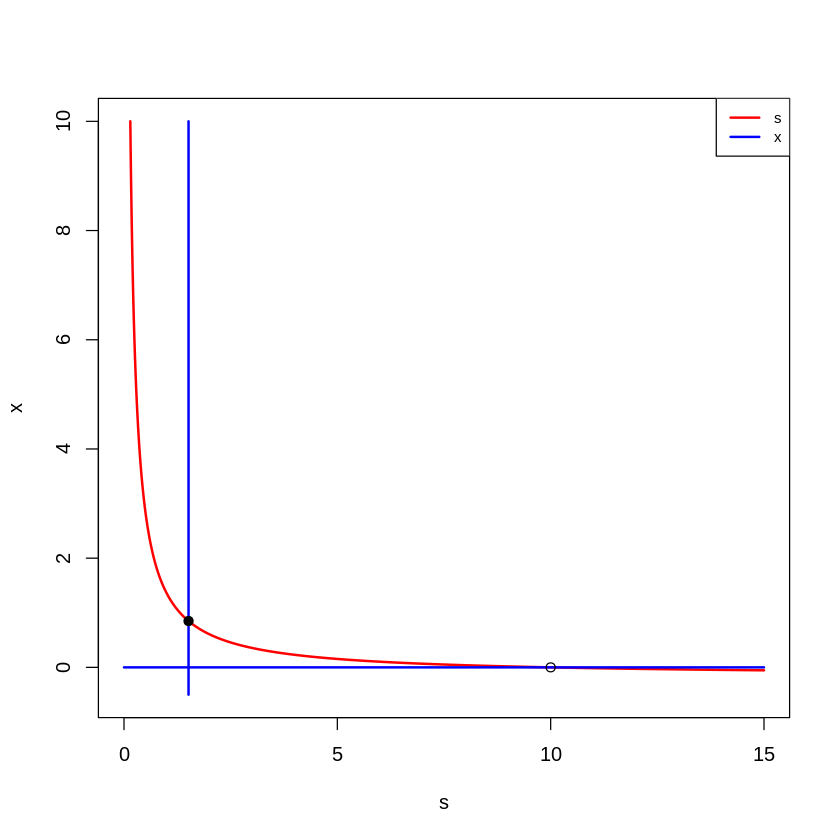

In [47]:
plane(xmin = 0, xmax = 15, ymin = -0.5, ymax = 10)
newton(state = c(s = 10, x = 0), plot = T)
newton(state = c(s = 1.5, x = 0.85), plot = T)

De acuerdo con la la salida anterior. El punto de equilibrio *ss1* es inestable, mientras que el punto de equilibrio *ss2* es estable.  

### Efecto del parámetro D sobre el punto de equilibrio

        s         x 
1.5126018 0.8487398 
Stable point, eigenvalues:  -0.05564356 -0.01 
 s  x 
10  0 
Unstable point, eigenvalues:  0.05315789 -0.01 
            s             x 
 1.000000e+01 -1.782727e-07 
Unstable point, eigenvalues:  0.05315792 -0.01 


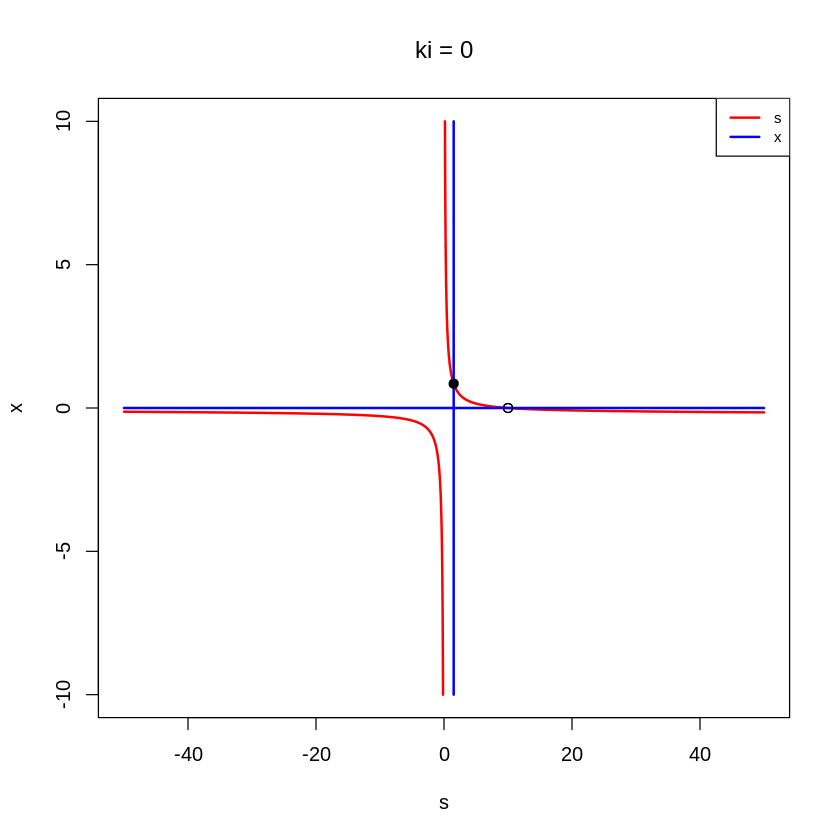

        s         x 
1.5127941 0.8487206 
Stable point, eigenvalues:  -0.05562108 -0.01 
 s  x 
10  0 
Unstable point, eigenvalues:  0.05282723 -0.01 
            s             x 
 1.000000e+01 -3.927376e-08 
Unstable point, eigenvalues:  0.05282723 -0.01 


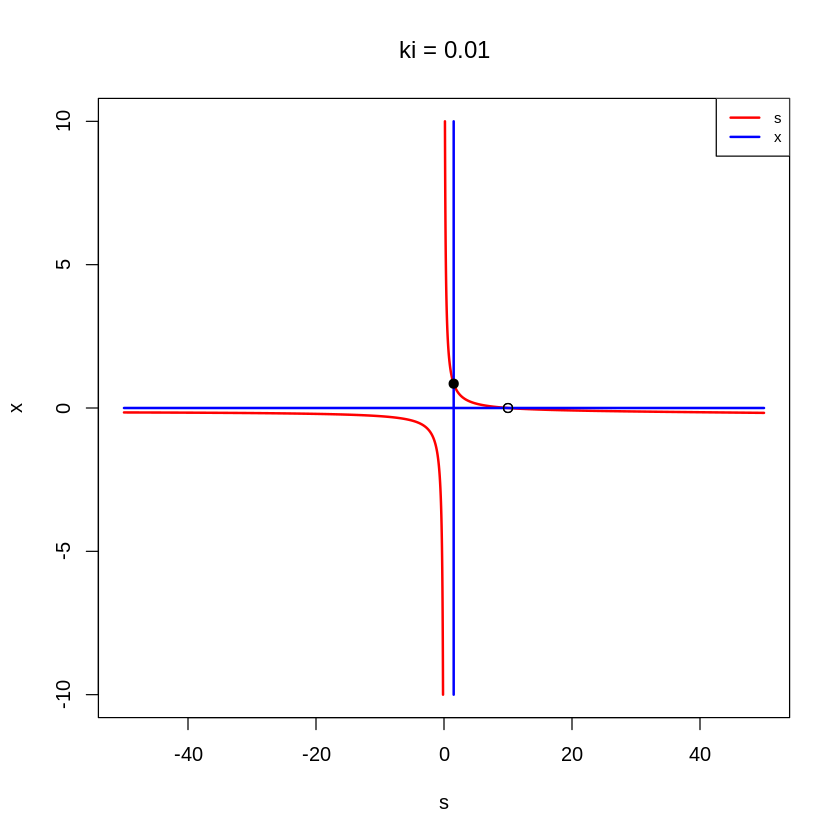

        s         x 
1.5751540 0.8424846 
Stable point, eigenvalues:  -0.04882771 -0.01 
           s            x 
9.999998e+00 2.268368e-07 
Unstable point, eigenvalues:  0.0144898 -0.01 
        s         x 
38.091513 -2.809151 
Stable point, eigenvalues:  -0.01 -0.006732469 


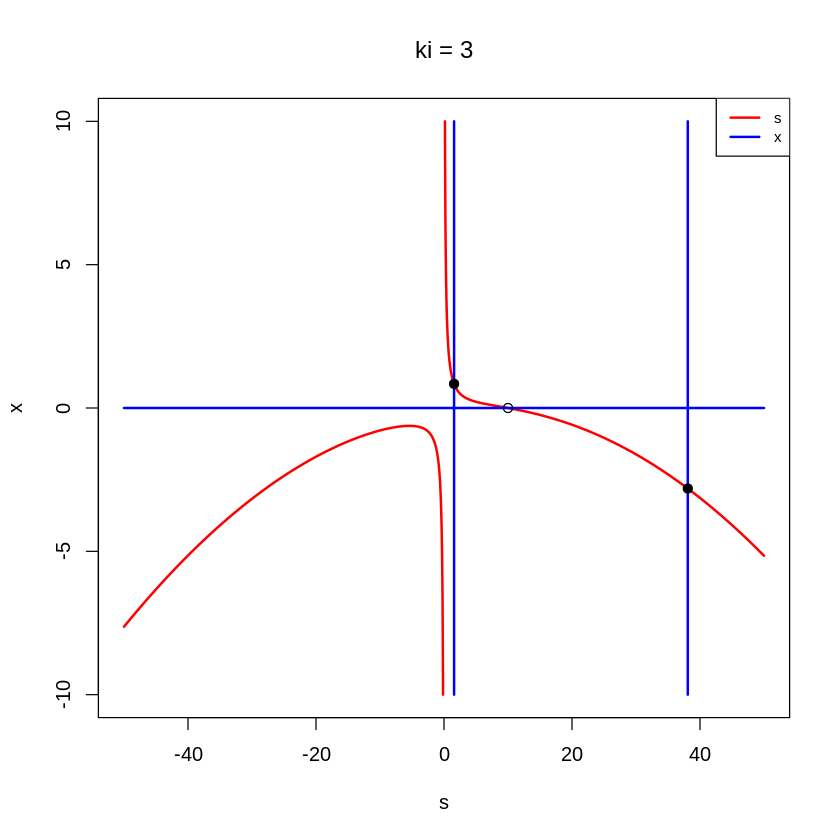

        s         x 
1.6233274 0.8376673 
Stable point, eigenvalues:  -0.04419129 -0.01 
 s  x 
10  0 
Unstable point, eigenvalues:  -0.01 0.007391304 
        s         x 
22.176721 -1.217672 
Stable point, eigenvalues:  -0.01 -0.004702247 


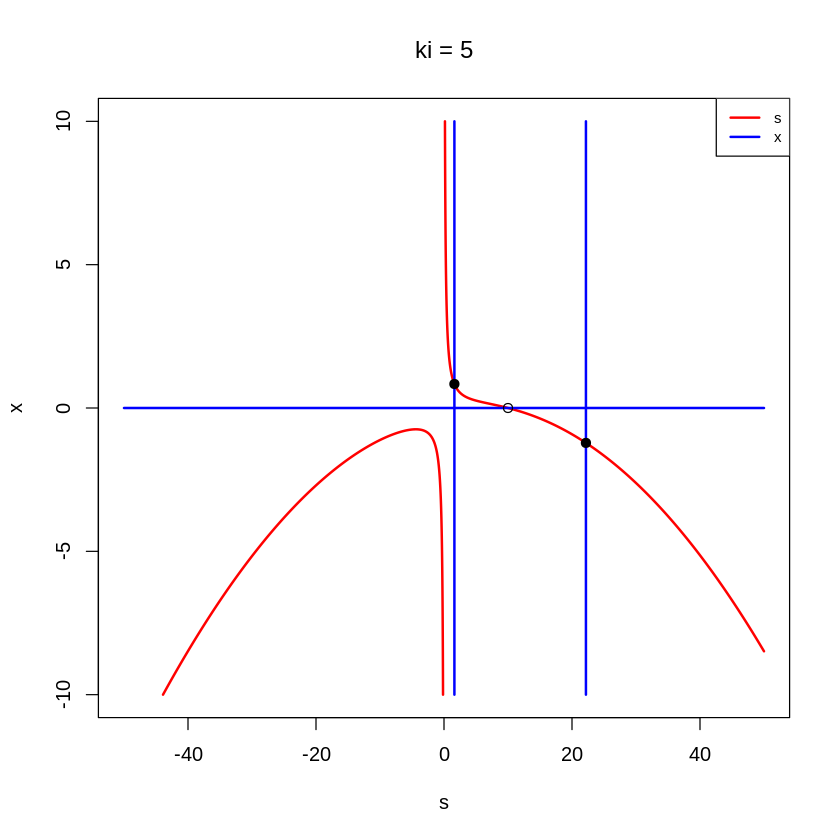

        s         x 
1.7783681 0.8221632 
Stable point, eigenvalues:  -0.03214334 -0.01 
           s            x 
9.999927e+00 7.258343e-06 
Unstable point, eigenvalues:  -0.01 8.413449e-05 
          s           x 
10.12244773 -0.01224477 
Stable point, eigenvalues:  -0.01 -8.466628e-05 


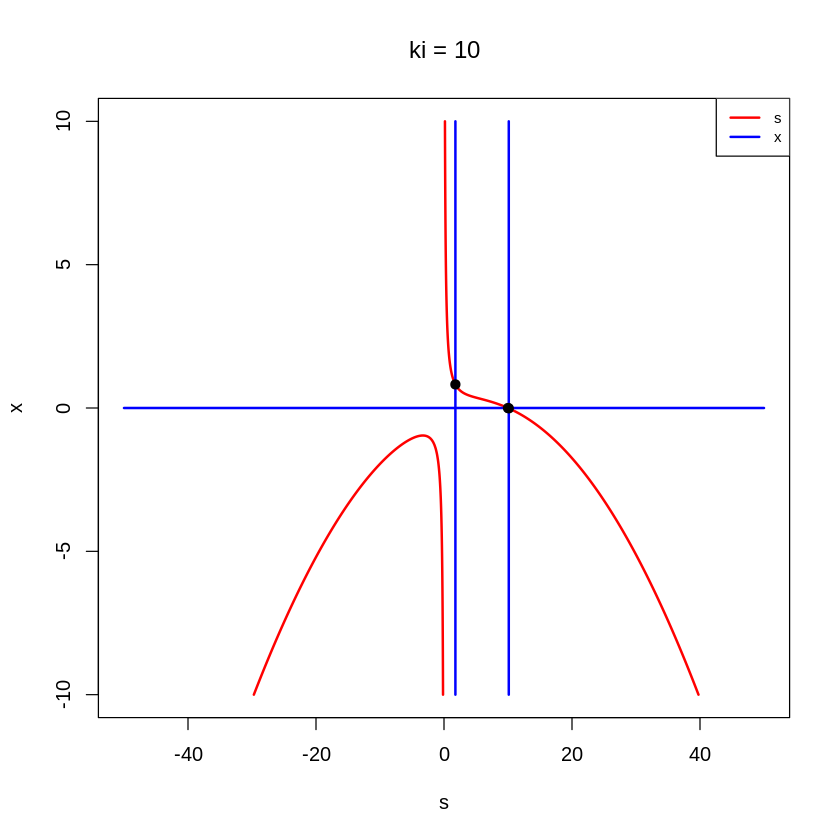

        s         x 
2.0341955 0.7965804 
Stable point, eigenvalues:  -0.01891864 -0.01 
        s         x 
5.8990963 0.4100904 
Unstable point, eigenvalues:  -0.01 0.003358522 
            s             x 
 1.000003e+01 -3.000566e-06 
Stable point, eigenvalues:  -0.01 -0.002899442 


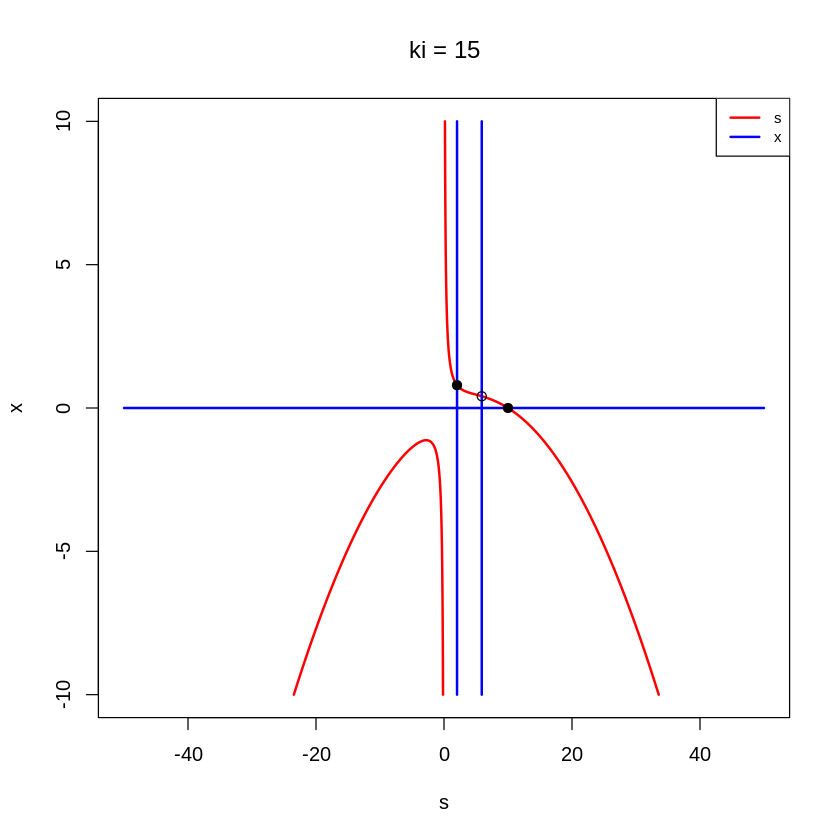

In [78]:
for (ki in c(0.0,0.01,3,5,10,15)) {

  p["ki"] <- ki
  plane(xmin = -50, xmax = 50, ymin = -10, ymax = 10, main = paste0("ki = ", ki))
  newton(state = c(s = 0, x = 1), plot = TRUE)
  newton(state = c(s = 7, x = 0.5), plot = TRUE)
  newton(state = c(s = 40, x = -5), plot = TRUE)
}
p["ki"] <- 0 # Regresar ki a su valor original

En la salida anterior vemos que al variar el valor del parámetro $D$ cambia el valor y la estabilidad de los puntos de equilibrio. Por ejemplo, al pasar de $D = 0.01$ a $D = 0.04$, el valor de $\bar{x}$ pasa de 0.8487 a 0.3779 (g/L), mientras que el valor de $\bar{s}$ pasa de 1.512 a 6.206 (g/L). Una primera observación de lo anterior es que el efecto de cambiar $D$ es mayor sobre $\bar{s}$ que sobre $\bar{x}$. Además, como la estabilidad de los puntos de equilibrio cambia, se espera observar bifurcaciones.  

### Diagrama de bifurcación 

        s         x 
1.5751540 0.8424846 
Stable point, eigenvalues:  -0.04882771 -0.01 
           s            x 
9.999998e+00 2.268368e-07 
Unstable point, eigenvalues:  0.0144898 -0.01 
        s         x 
38.091513 -2.809151 
Stable point, eigenvalues:  -0.01 -0.006732469 
Starting at ki = 3 with:
        s         x 
1.5751540 0.8424846 
Turning point point at ki = 19.66875 
Bifurcation at ki = -1.946875 
Starting at ki = 3 with:
           s            x 
9.999998e+00 2.268368e-07 
Bifurcation at ki = 10.2 
Bifurcation at ki = -2 
Starting at ki = 3 with:
        s         x 
38.091513 -2.809151 


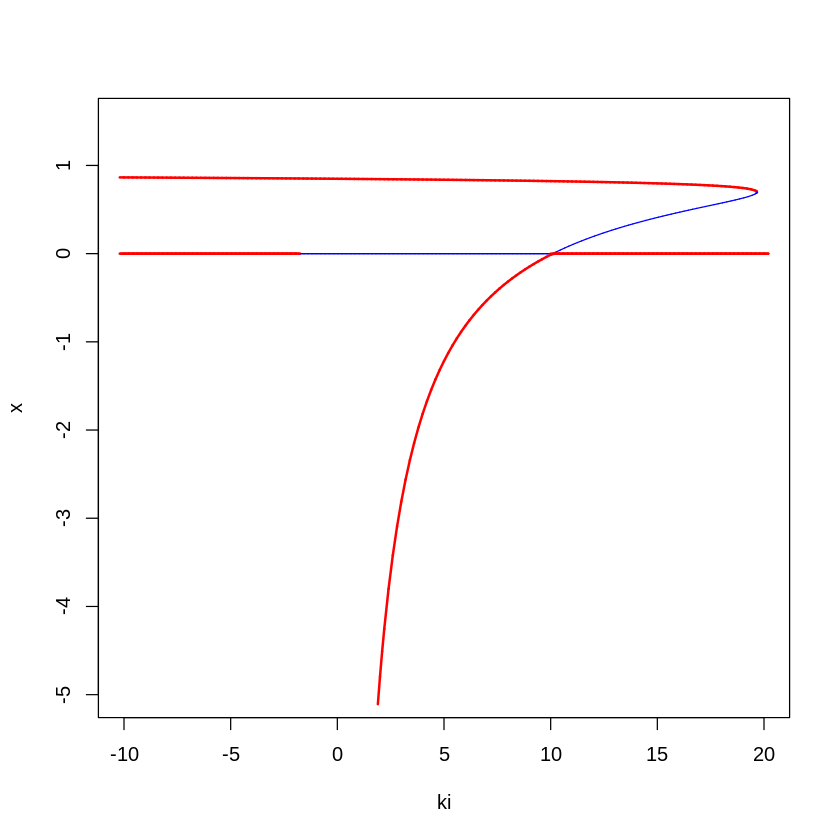

In [85]:
p["ki"] <- 3
ss1 <- newton(state = c(s = 0, x = 1))
ss2 <- newton(state = c(s = 7, x = 0.5))
ss3 <- newton(state = c(s = 40, x = -5))

continue(state = ss1, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "x", ymin = -5, ymax = 1.5)

continue(state = ss2, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "x", ymin = -5, ymax = 1.5, add = TRUE)

continue(state = ss3, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "x", ymin = -5, ymax = 1.5, add = TRUE)

Starting at ki = 3 with:
        s         x 
1.5751540 0.8424846 
Turning point point at ki = 19.66875 
Bifurcation at ki = -1.946875 
Starting at ki = 3 with:
           s            x 
9.999998e+00 2.268368e-07 
Bifurcation at ki = 10.2 
Bifurcation at ki = -2 
Starting at ki = 3 with:
        s         x 
38.091513 -2.809151 


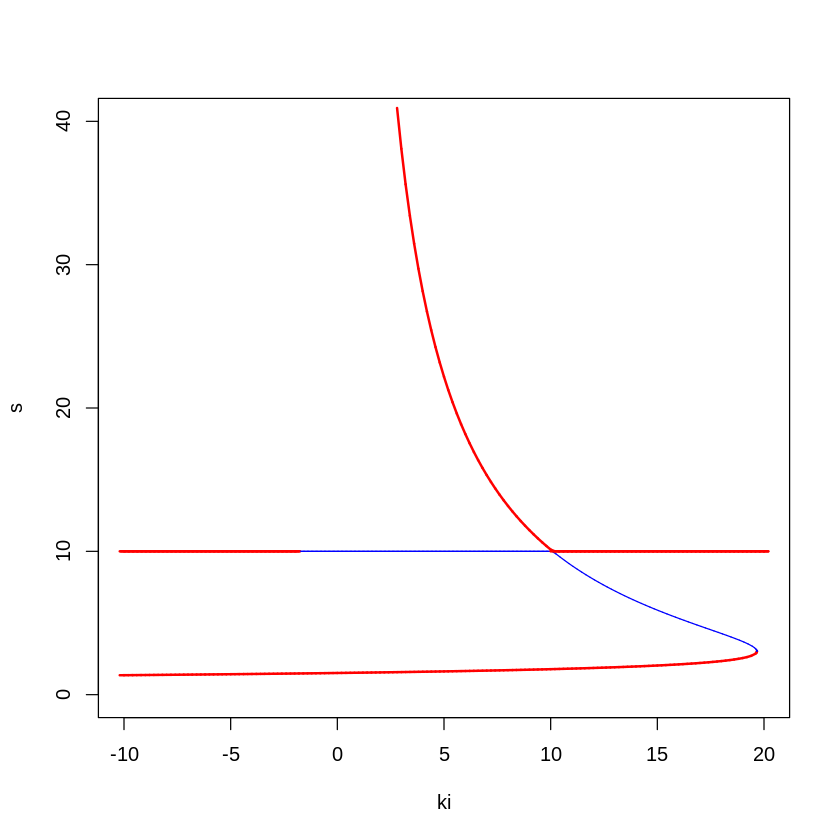

In [86]:
p["ki"] <- 3

continue(state = ss1, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "s", ymin = 0, ymax = 40)

continue(state = ss2, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "s", ymin = 0, ymax = 40, add = TRUE)

continue(state = ss3, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "s", ymin = 0, ymax = 40, add = TRUE)

# Transcritial Bifurcation

There are certain scientific situations where a fixed point must exist for all values
of a parameter and can never be destroyed. For example, in the logistic equation
and other simple models for the growth of a single species, there is a fixed point at
zero population, regardless of the value of the growth rate. However, such a fixed
point may change its stability as the parameter is varied. The transcritical bifurcation is the standard mechanism for such changes in stability.

The normal form for a transcritical bifurcation is:

$$\frac{dx}{dt} = rx - x^2$$

In [27]:
model <- function(times,state,parms) {
        with(as.list(c(parms,state)), {
                
                dx = r*x - x^2
                dy = -y
                return(list(c(dx,dy)))
        })
}

Warning message in stode(y, times, func, parms = parms, ...):
“error during factorisation of matrix (dgefa);         singular matrix”


diagonal element is zero 
[1] 2


Warning message in stode(y, times, func, parms = parms, ...):
“steady-state not reached”


No convergence: start closer to a steady state

Warning message in stode(y, times, func, parms = parms, ...):
“error during factorisation of matrix (dgefa);         singular matrix”


diagonal element is zero 
[1] 2


Warning message in stode(y, times, func, parms = parms, ...):
“steady-state not reached”


No convergence: start closer to a steady state

Warning message in stode(y, times, func, parms = parms, ...):
“error during factorisation of matrix (dgefa);         singular matrix”


diagonal element is zero 
[1] 2


Warning message in stode(y, times, func, parms = parms, ...):
“steady-state not reached”


No convergence: start closer to a steady state

Warning message in stode(y, times, func, parms = parms, ...):
“error during factorisation of matrix (dgefa);         singular matrix”


diagonal element is zero 
[1] 2


Warning message in stode(y, times, func, parms = parms, ...):
“steady-state not reached”


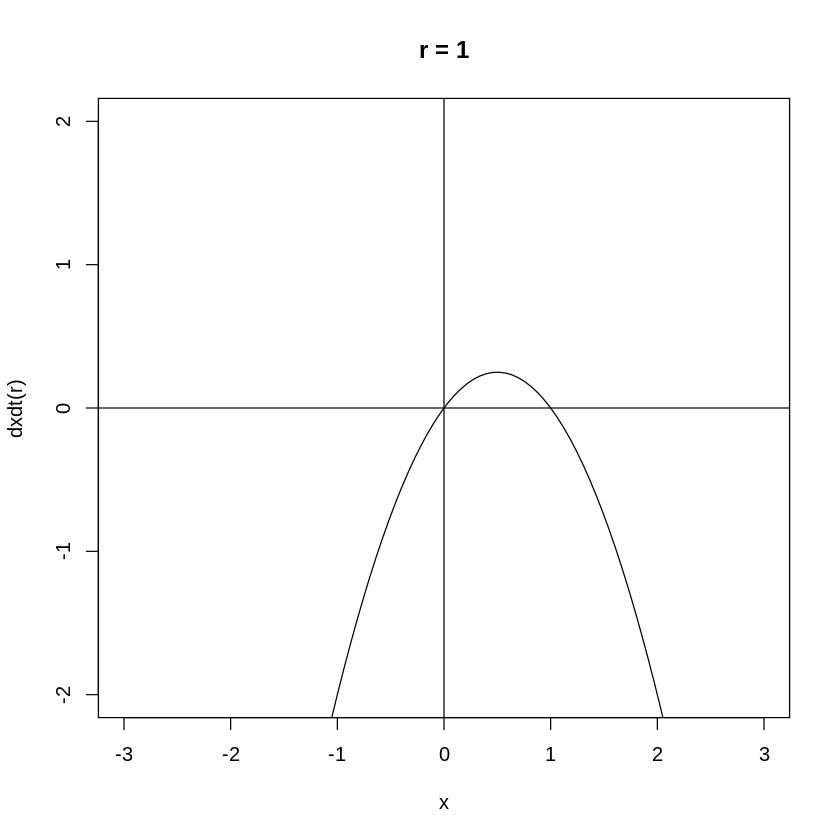

No convergence: start closer to a steady state

Warning message in stode(y, times, func, parms = parms, ...):
“error during factorisation of matrix (dgefa);         singular matrix”


diagonal element is zero 
[1] 2


Warning message in stode(y, times, func, parms = parms, ...):
“steady-state not reached”


No convergence: start closer to a steady state

Warning message in stode(y, times, func, parms = parms, ...):
“error during factorisation of matrix (dgefa);         singular matrix”


diagonal element is zero 
[1] 2


Warning message in stode(y, times, func, parms = parms, ...):
“steady-state not reached”


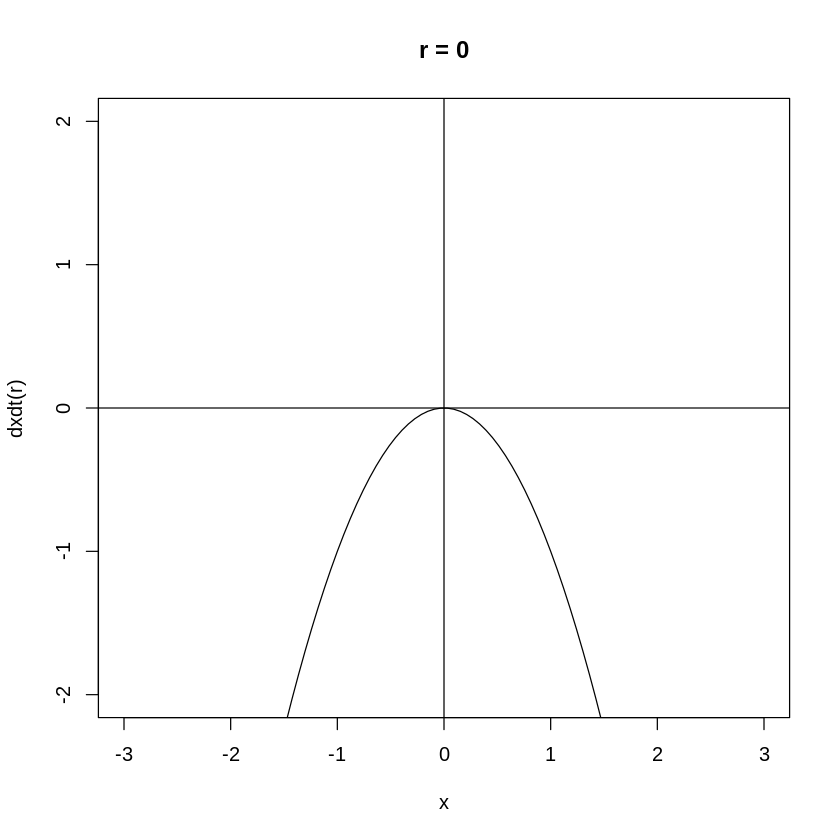

No convergence: start closer to a steady state

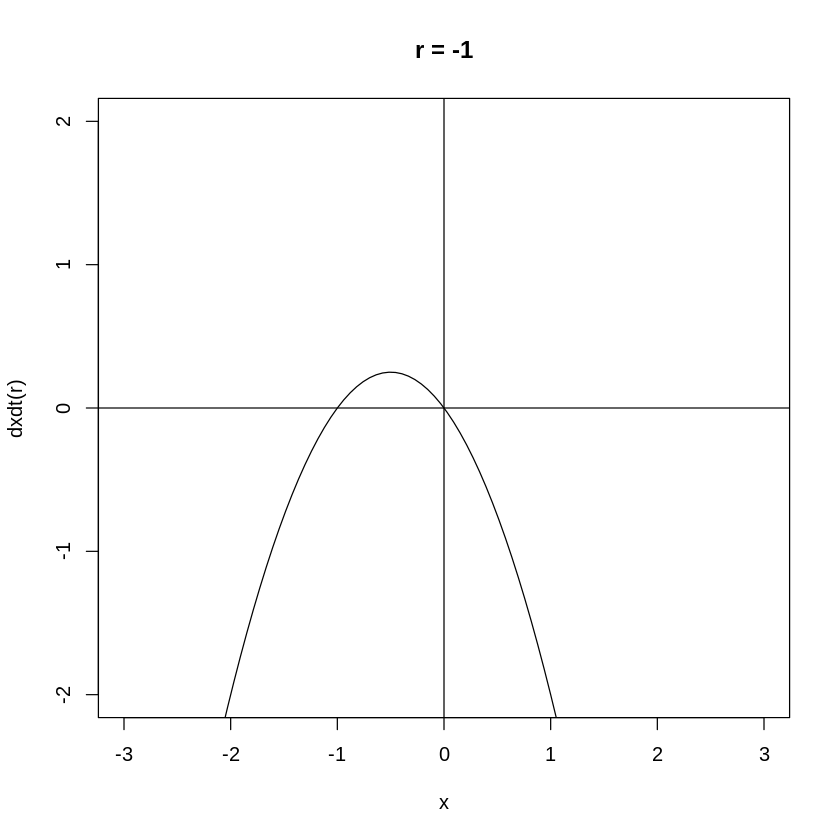

In [28]:
# The two steady states change their stability 

dxdt <- function(r) {
        
        f <- r*x - x^2
        return(f)
}

x <- seq(-3,3,len=100)

for (r in c(1,0,-1)) {
        plot(x,dxdt(r), ylim = c(-2,2), type = "l", main = paste0("r = ",r))
        abline(h = 0)
        abline(v = 0)
        p["r"] <- r
        newton(state = c(x=-1,y=0), plot = TRUE)
        newton(state = c(x=1,y=0), plot = TRUE)
}

For r < 0 , there is an unstable fixed point at x* = r and a stable fixed point at x* = 0 . As r increases, the unstable fixed point approaches the origin, and coalesces with it when r = 0. Finally, when r > 0, the origin has become unstable, and x* = r is now stable. Some people say that an exchange of stabilities has taken place between the two fixed points. 

In the transcritical case, the two fixed points don't disappear after the bifurcation-instead they just switch their stability

In [29]:
p <- c(r = 0.5, b = 1)

In [30]:
s <- c(x=0.1, y = 1)

In [31]:
times <- seq(0,100,len = 100)

x            y 
5.000000e-01 4.582996e-30

x y 
0 0 
Unstable point, eigenvalues:  0.5 -1 
  x   y 
0.5 0.0 
Stable point, eigenvalues:  -0.5 -1 


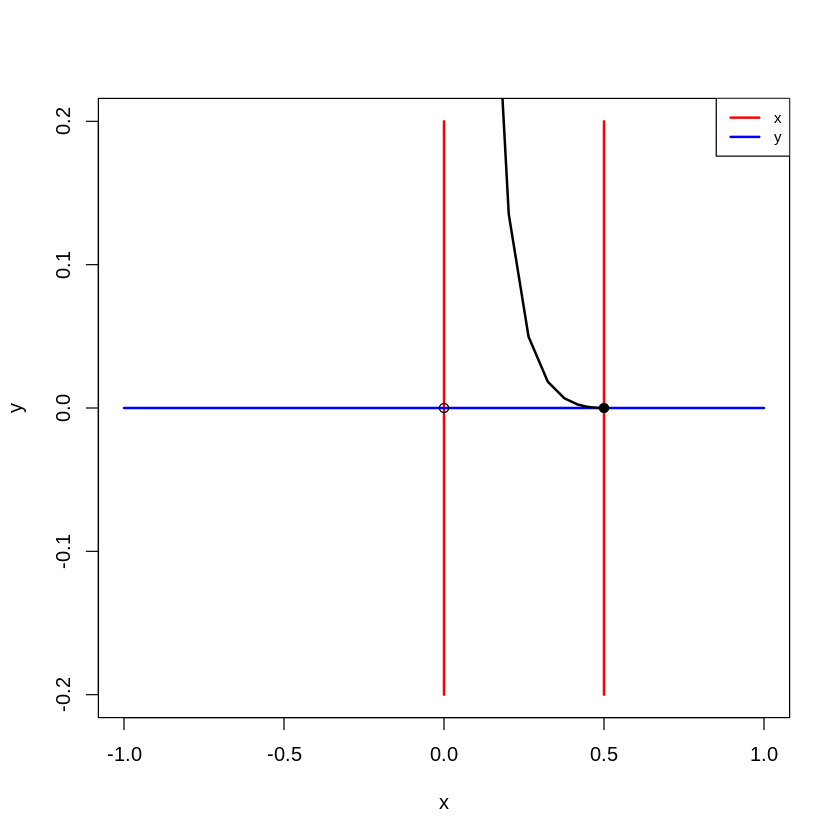

In [32]:
plane(xmin = -1,xmax = 1,ymin = -0.2, ymax = 0.2, vector = F, portrait = F)
run(traject = T)
ss1 <- newton(state = c(x=-1,y=0), plot = T)
ss2 <- newton(state = c(x=1,y=0), plot = T)

Starting at r = 0.5 with:
x y 
0 0 
Bifurcation at r = -1.734723e-16 
Starting at r = 0.5 with:
  x   y 
0.5 0.0 
Turning point point at r = 0.00140625 
Final point at r = 0.00859375 
If this looks wrong try changing the step size
Starting at r = -0.5 with:
   x    y 
-0.5  0.0 
Turning point point at r = -0.00140625 
Final point at r = -0.00859375 
If this looks wrong try changing the step size


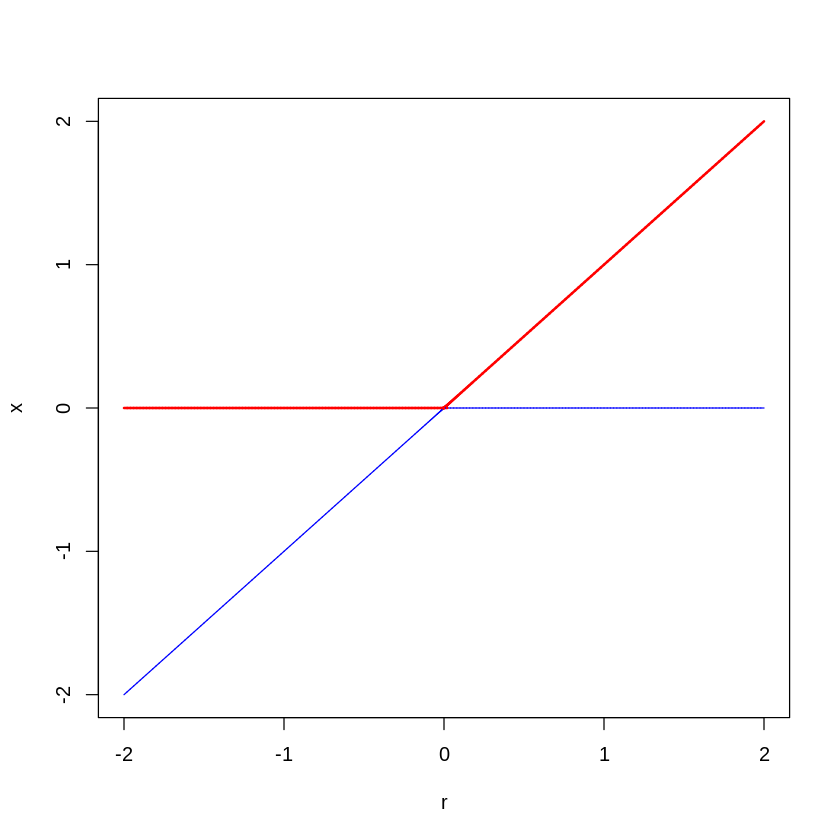

In [33]:
p["r"] <- 0.5
continue(state = ss1, x = "r", step = 0.01, xmin = -2, xmax = 2, y = "x", ymin = -2, ymax = 2)
continue(state = ss2, x = "r",step = 0.01,xmin = -2, xmax = 2,y = "x",ymin = -2,ymax = 2,add = T)
p["r"] <- -0.5
continue(state = c(x=-1,y=0),x = "r",step = 0.01,xmin = -2,xmax = 2,y = "x",ymin = -2,ymax = 2,add = T)

# Restricciones en el punto de equilibrio 

Vemos que el punto de equilibrio 

$$P_{2}: \hspace{1cm} \bar{s} = \frac{Dk}{\mu - D}, \hspace{0.25cm} \bar{x} = \frac{y(Dk + s_{f}(D-\mu))}{D-\mu}$$

requiere que el valor de $D$ sea menor que $\mu$ para tener un valor positivo de sustrato en el equilibrio. Para entender esto podemos graficar la tasa de crecimiento y la tasa de dilución como función de la concentración de sustrato.

In [34]:
# función para graficar tasas de crecimiento y dilución 
rates <- function(p) {
  with(as.list(p), {

    s <- seq(0,1000,len=1000)
    # tasa de crecimiento 
    mu = mu*s/(k + s)

    # tasa de dilución 
    D = rep(D, length(s))

    data = data.frame(s=s,mu=mu,D=D)

    return(data)

  })
}

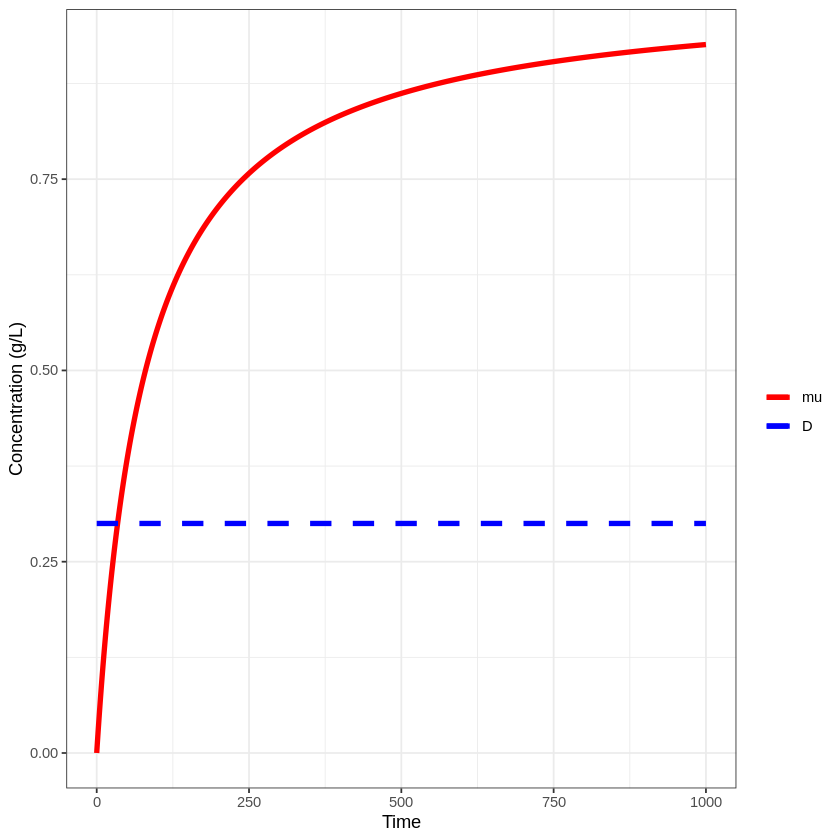

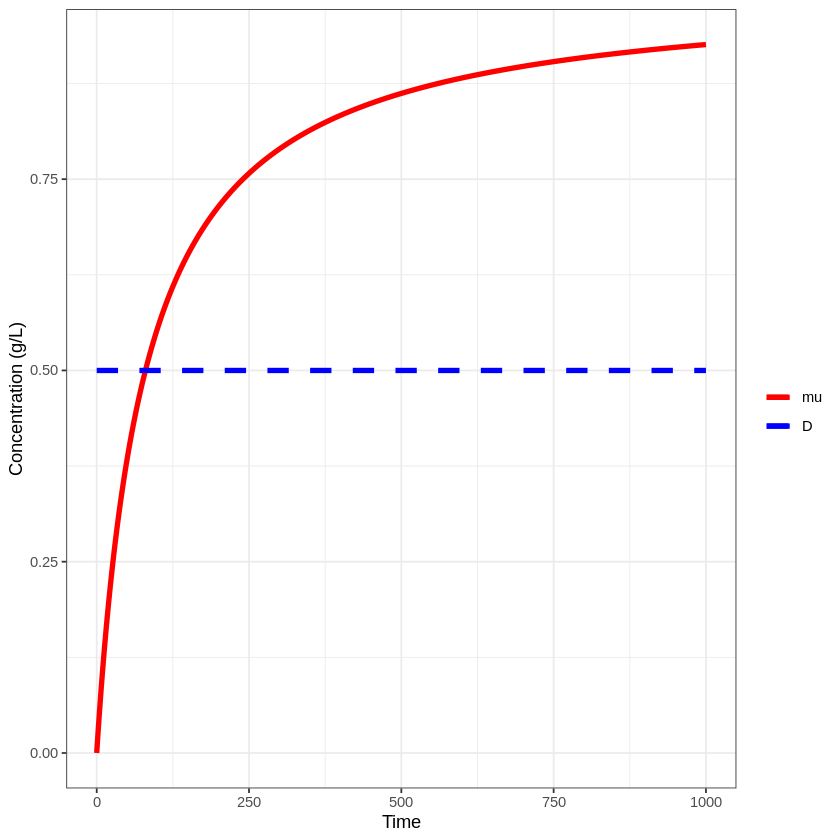

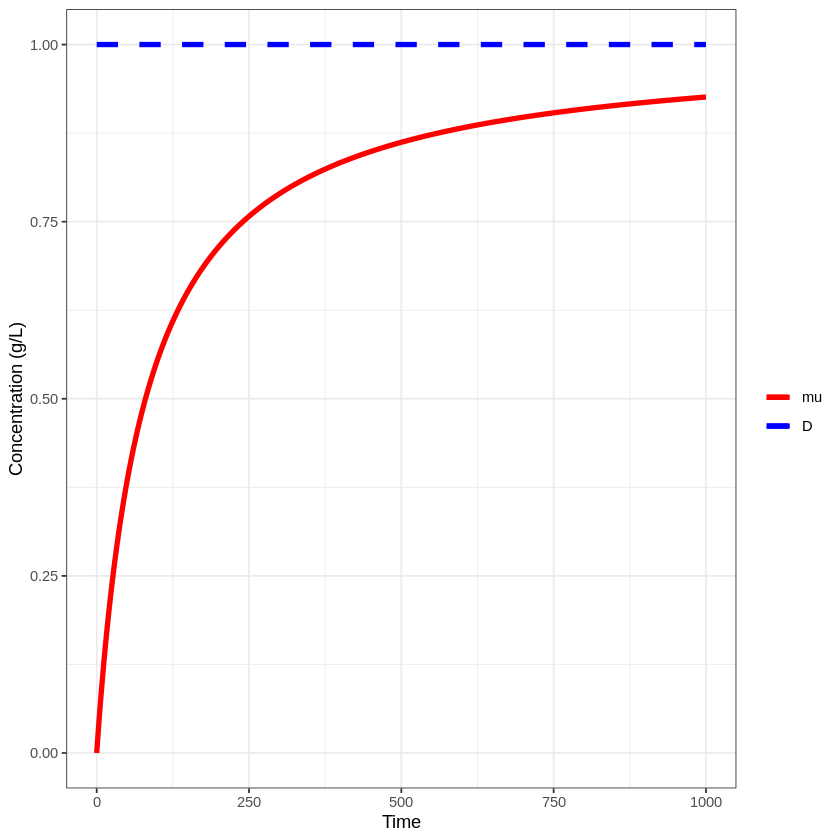

In [35]:
for (D in c(0.3,0.5,1)) {
  p <- c(mu = 1, k = 80, y = 0.1, D = D, sf = 10)
  data <- rates(p)
  # graficar tasas 
  print(
    ggplot(data,aes(s)) +
    geom_line(aes(y = mu, color = "mu"), lwd = 1.5) +
    geom_line(aes(y = D, color = "D"), lwd = 1.5, lty = 2) + 
    scale_color_manual("", breaks = c("mu","D"), values = c("red", "blue")) +
    xlab("Time") +
    ylab("Concentration (g/L)") +
    theme(title = paste0("D = ", D)) +
    theme_bw()
  )
}

Para que exista un equilibrion en la concentración de biomasa, es decir, $dx/dt = 0$, es necesarion que la tasa de crecimiento iguale a la tasa de dilución, pero como se puede observar en la salida anterior, si la tasa de dilución es demasiado grande, no importa cuando aumente $s$, las tasas no serán iguales. 

### Linealización

El siguiente analisis se puede obtener usando la función `newton()`, sin embargo, se considera importante observar la manera en la que se calcula la estabilidad de los puntos de equilibrio a partir de la linealización del sistema de EDO.

Las derivadas parciales en la matriz Jacobiana se pueden obtener mediante la librería `numpy` de Python. https://github.com/JuanM-GG/sistemas-dinamicos-Python/blob/main/puntos_de_equilibrio_monod.ipynb

In [36]:
# función que calcula la matriz Jacobiana en el punto de equilibrio 
my_jacobi <- function(ss,p) {
  with(as.list(c(ss,p)), {

    dfdx = mu*s/(k+s) - D
    dfds = mu*k*x/(k+s)**2
    dgdx = -(1/y)*mu*s/(k+s)
    dgds = -D - (1/y)*mu*k*x/(k+s)**2

    A = matrix(c(dfdx,dfds,dgdx,dgds), nrow = 2, byrow = T)

    trace = dfdx + dgds

    det = dfdx*dgds - dgdx*dfds

    lamda1 = (trace - (trace**2 - 4*det)^{1/2})/2
    lamda2 = (trace + (trace**2 - 4*det)^{1/2})/2

    out = list(A = A, eigenvals = c(lamda1 = round(lamda1, 3), lamda2 = round(lamda2, 3)))

    return(out)

  })
}

In [37]:
# establecer parámetros 
p <- c(mu = 1.2, k = 180, y = 0.1, D = 0.01, sf = 10)

In [38]:
# obtener puntos de equilibrio 
ss1 <- steady_state(p)$ss1
ss2 <- steady_state(p)$ss2

In [39]:
# evaluar matriz Jacobiana en punto de equilibrio (s* = sf, x* = 0)
J1 <- my_jacobi(ss1, p)
J1

0.05315789,0.00
-0.63157895,-0.01


In [40]:
# evaluar matriz Jacobiana en punto de equilibrio (s* = k*D/(mu-D), x* = y*(sf-s*))
J2 <- my_jacobi(ss2, p)
J2

2.589346e-06,0.005566035
-1.000259e-01,-0.065660355


El resultado es el mismo que el obtenido con la fución `newton()`